In [116]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib import pyplot
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.extmath import svd_flip
from scipy.linalg import eigh,eig
from scipy.sparse.linalg import eigsh
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix

Actual Data


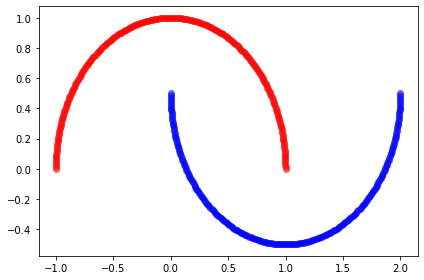

In [117]:
Xmoon, ymoon = make_moons(n_samples=500, random_state=123)
plt.scatter(Xmoon[ymoon==0, 0], Xmoon[ymoon==0, 1],color='red', alpha=0.5)
plt.scatter(Xmoon[ymoon==1, 0], Xmoon[ymoon==1, 1],color='blue', alpha=0.5)
plt.tight_layout()
print("Actual Data")
plt.show()

In [120]:
def PCA(X_train, Y_train,d):
    X=[]
    
    for i in range(len(X_train)):
        collectedData = np.asarray(X_train[i])
        A=collectedData.flatten()
        X.append(A)

    X = np.asarray(X, dtype=float)
    Xmean = np.mean(X.T,axis=0)
    
    X_c = X.T - Xmean
    cov_mat=np.cov(X_c)
    eig_vals,eig_vecs=np.linalg.eigh(cov_mat)
    
    dimen =d
    PCAimage = X@eig_vecs[:,:dimen]                     
    return PCAimage

After applying Simple PCA


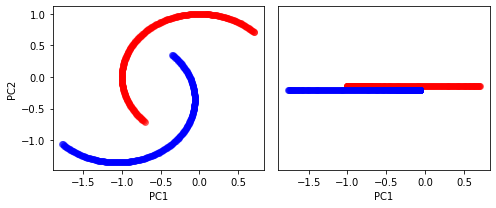

In [121]:
X_spca = PCA(Xmoon,ymoon,2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[ymoon==0, 0], X_spca[ymoon==0, 1],color='red', alpha=0.5)
ax[0].scatter(X_spca[ymoon==1, 0], X_spca[ymoon==1, 1],color='blue', alpha=0.5)
ax[1].scatter(X_spca[ymoon==0, 0], np.zeros((250,1))+0.02,color='red', alpha=0.5)
ax[1].scatter(X_spca[ymoon==1, 0], np.zeros((250,1))-0.02,color='blue', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
print("After applying Simple PCA")
plt.show()

In [17]:
def Radial(x1, x2, gamma):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) * gamma)

def Laplacian(x1, x2, gamma):
    diff = x1 - x2
    return np.exp(-np.abs(diff) * gamma)

def Sigmoid(x1, x2):
    return np.exp(np.dot(x1, x2))/(1+(np.exp(np.dot(x1, x2))))

def Linear(x1, x2):
    return np.dot(x1, x2)

def Polynomial(x1,x2, power):
    prod = np.dot(x1, x2)
    return (prod + 10*len(x1))**power


def kernel_pca(X, n_components, hyperparameter,kernel="G"):
    
    if(kernel== "G"):
        K = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  Radial(x1, x2, hyperparameter), 1, X),1, X)
    if(kernel== "P"):   
        K = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  Polynomial(x1, x2, hyperparameter), 1, X),1, X)
    if(kernel== "L"):   
        K = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  Linear(x1, x2), 1, X),1, X)
    if(kernel== "La"):   
        K = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  Polynomial(x1, x2, hyperparameter), 1, X),1, X)
    if(kernel== "S"):   
        K = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  Linear(x1, x2), 1, X),1, X)

    
    
    # centralizing the data points and computing kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs of the kernel matrix
    eigvals, eigvecs = eigh(K)
    eigvecs, _ = svd_flip(eigvecs, np.zeros_like(eigvecs).T)
    
    
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]    
    # Collect the top k eigenvectors and projecting data to new space
    X_pc = np.column_stack([eigvecs[:, i]* np.sqrt(eigvals[i]) for i in range(n_components)])
    
    return X_pc

Gaussian Kernel with sigma =12


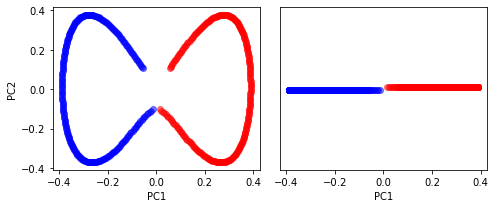

In [122]:
X_kpca = kernel_pca(Xmoon, hyperparameter=12, n_components=2,kernel="G")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[ymoon==0, 0], X_kpca[ymoon==0, 1],color='red', alpha=0.5)
ax[0].scatter(X_kpca[ymoon==1, 0], X_kpca[ymoon==1, 1],color='blue', alpha=0.5)
ax[1].scatter(X_kpca[ymoon==0, 0], np.zeros((250,1))+0.02,color='red', alpha=0.5)
ax[1].scatter(X_kpca[ymoon==1, 0], np.zeros((250,1))-0.02,color='blue', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
print("Gaussian Kernel with sigma =12")
plt.show()

Polynomial Kernel with power =7


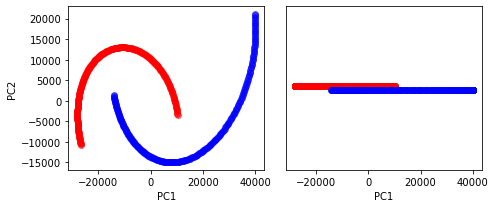

In [123]:
X_kpca = kernel_pca(Xmoon, hyperparameter=7, n_components=2,kernel="P")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[ymoon==0, 0], X_kpca[ymoon==0, 1],color='red', alpha=0.5)
ax[0].scatter(X_kpca[ymoon==1, 0], X_kpca[ymoon==1, 1],color='blue', alpha=0.5)
ax[1].scatter(X_kpca[ymoon==0, 0], np.zeros((250,1))+0.02,color='red', alpha=0.5)
ax[1].scatter(X_kpca[ymoon==1, 0], np.zeros((250,1))-0.02,color='blue', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
print("Polynomial Kernel with power =7")
plt.show()

Laplacian Kernel with sigma = 10


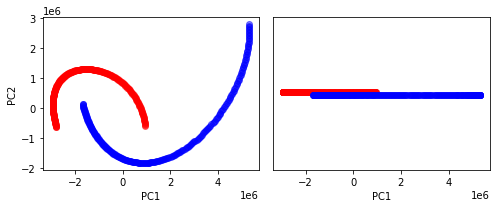

In [124]:
X_kpca = kernel_pca(Xmoon, hyperparameter=10, n_components=2,kernel="La")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[ymoon==0, 0], X_kpca[ymoon==0, 1],color='red', alpha=0.5)
ax[0].scatter(X_kpca[ymoon==1, 0], X_kpca[ymoon==1, 1],color='blue', alpha=0.5)
ax[1].scatter(X_kpca[ymoon==0, 0], np.zeros((250,1))+0.02,color='red', alpha=0.5)
ax[1].scatter(X_kpca[ymoon==1, 0], np.zeros((250,1))-0.02,color='blue', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
print("Laplacian Kernel with sigma = 10")
plt.show()

Sigmoid Kernel


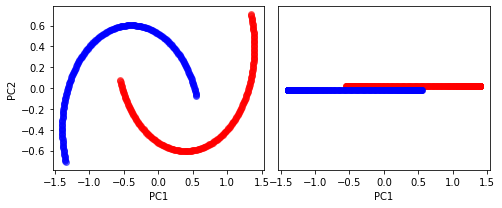

In [125]:
X_kpca = kernel_pca(Xmoon, hyperparameter=10, n_components=2,kernel="S")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[ymoon==0, 0], X_kpca[ymoon==0, 1],color='red', alpha=0.5)
ax[0].scatter(X_kpca[ymoon==1, 0], X_kpca[ymoon==1, 1],color='blue', alpha=0.5)
ax[1].scatter(X_kpca[ymoon==0, 0], np.zeros((250,1))+0.02,color='red', alpha=0.5)
ax[1].scatter(X_kpca[ymoon==1, 0], np.zeros((250,1))-0.02,color='blue', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
print("Sigmoid Kernel")
plt.show()

In [29]:
# load training data
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('Train: X=%s, Y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, Y=%s' % (X_test.shape, Y_test.shape))

Train: X=(60000, 28, 28, 1), Y=(60000, 10)
Test: X=(10000, 28, 28, 1), Y=(10000, 10)


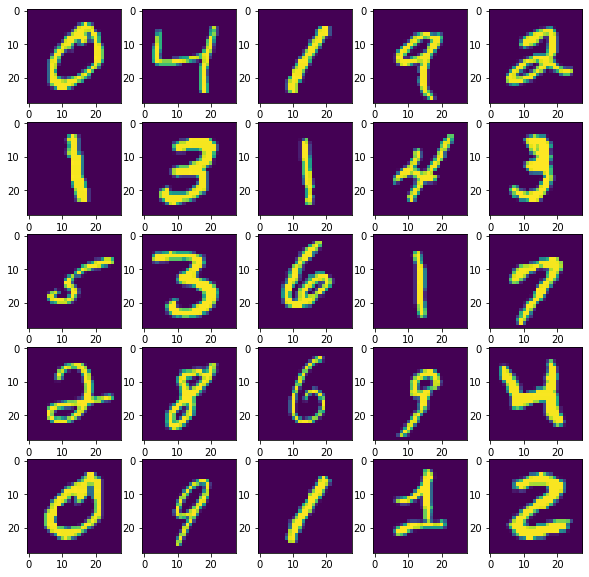

In [51]:
def display_image(X, size):
    w = 5
    h = 5
    fig = plt.figure(figsize=(10, 10))
    columns = 5
    rows = 5
    for i in range(1, columns*rows +1):
        img = X[i].reshape(size,size,order='F')
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    
display_image(X_train,28)

In [72]:
#Data preprocessing
X=[]
Y=[]
for i in range(1500):
    collectedData = np.asarray(X_train[i])
    A=collectedData.flatten()
    X.append(A)

X = np.asarray(X, dtype=float)
Xmean = np.mean(X.T,axis=0)

for i in range(1500):
    idx=0
    for j in range(10):
        if(Y_train[i][j]==1):
            idx=j
    Y.append(idx)
Y = np.asarray(Y, dtype=float)


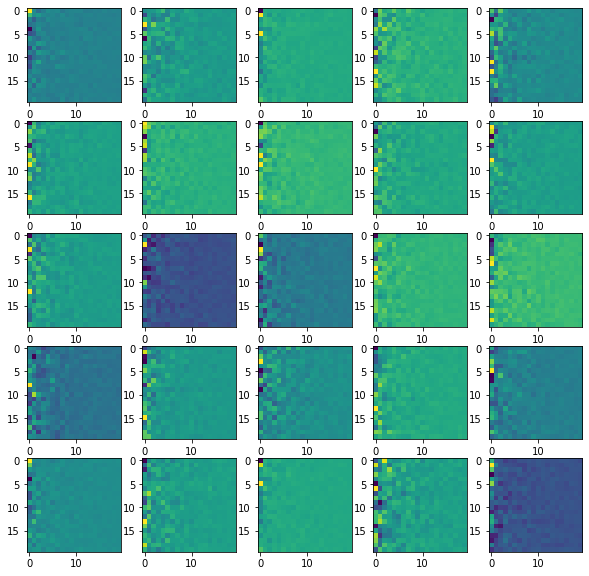

In [80]:
scikit_pca1 = KernelPCA(n_components=400)
X_Imagepca = scikit_pca1.fit_transform(X)
display_image(X_Imagepca,20)

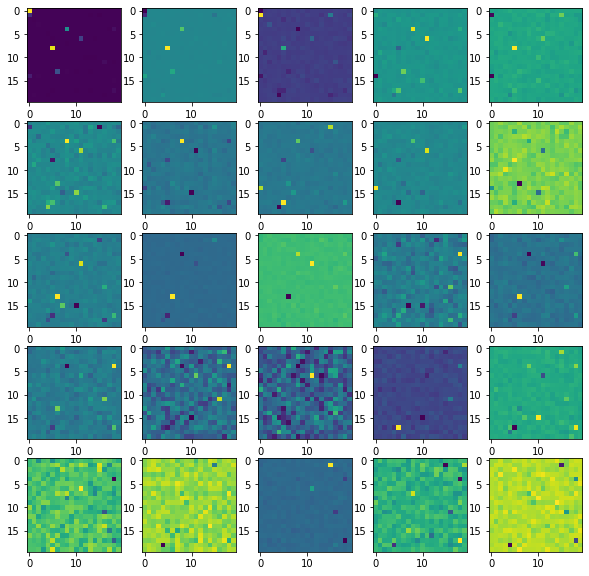

In [91]:
X_kpca_g = kernel_pca(X, n_components=400, kernel ="G", hyperparameter=12)
display_image(X_kpca_g,20)

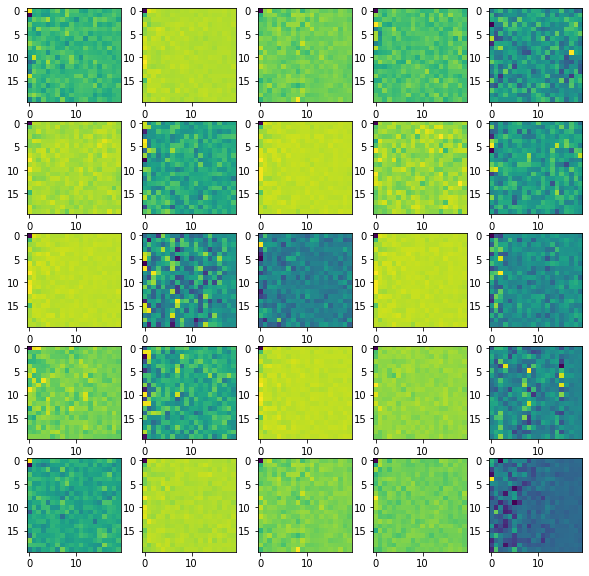

In [95]:
X_kpca_p = kernel_pca(X, n_components=400, kernel ="P", hyperparameter=5)
display_image(X_kpca_p,20)

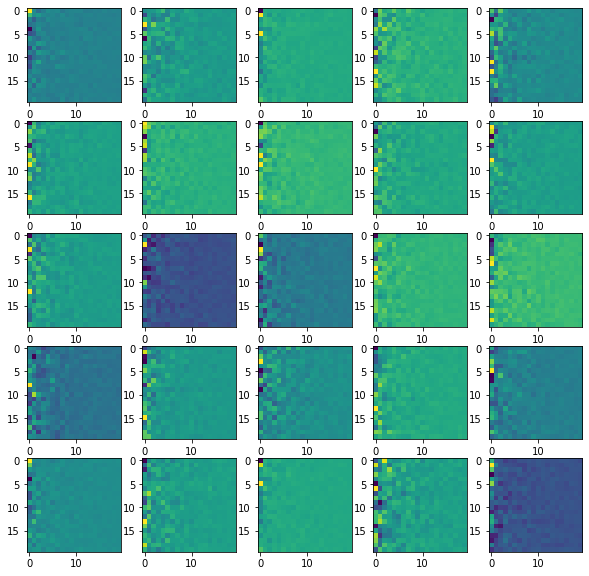

In [87]:
X_kpca = kernel_pca(X, n_components=400, kernel ="L", hyperparameter=1)
display_image(X_kpca,20)

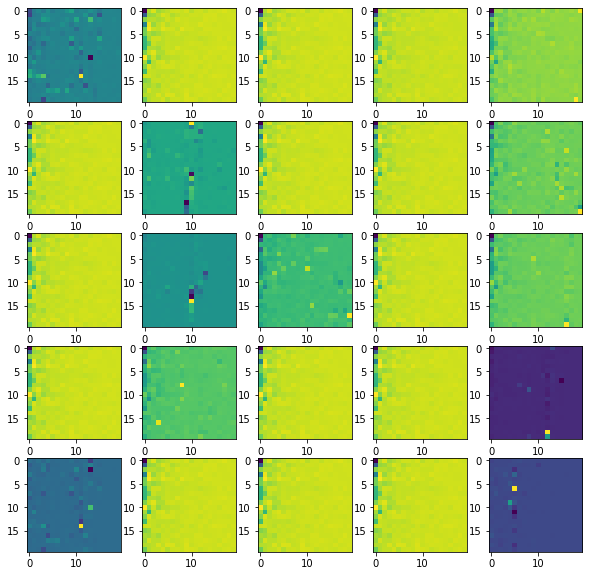

In [89]:
X_kpca = kernel_pca(X, n_components=400, kernel ="La", hyperparameter=12)
display_image(X_kpca,20)

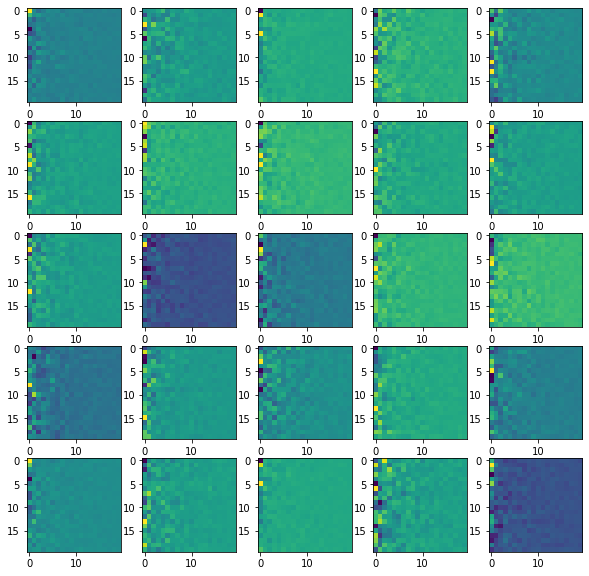

In [73]:
X_kpca = kernel_pca(X, n_components=400, kernel ="S", hyperparameter=1)
display_image(X_kpca,20)

In [75]:
X_kpca[0:1000,:].shape

(1000, 400)

In [78]:
svc = SVC(gamma='auto', random_state=42, verbose=True)
svc.fit(X_kpca[0:1000,:], Y[0:1000])

p = svc.predict(X_kpca[1000:,:])
print("SVC Accuracy:", accuracy_score(Y[1000:] ,p))



[LibSVM]SVC Accuracy: 0.12


In [97]:
def gen_data(num_pos: int,
             num_neg: int,):
    
    
    mean_pos = np.asarray(([[1], [1]]))
    sigma_pos = np.eye(2)
    mean_neg = np.asarray(([[-1], [-1]]))
    sigma_neg = np.eye(2)
    
    # Dimension of the feature vectors
    num_features = sigma_pos.shape[0]

    # Initialize the features and labels
    features = np.zeros(shape=(num_pos + num_neg, num_features))
    labels = np.zeros(shape=(num_pos + num_neg, 1))
    
    
    positiveFeature = np.random.multivariate_normal(np.asarray(mean_pos).flatten(),sigma_pos,num_pos)
    negativeFeature = np.random.multivariate_normal(np.asarray(mean_neg).flatten(),sigma_neg,num_neg)
    
    positiveLabel = np.ones((num_pos,1))
    negativeLabel = np.zeros((num_neg,1))
    
    features = np.concatenate((positiveFeature,negativeFeature),axis=0)
    labels = np.concatenate((positiveLabel,negativeLabel),axis=0)
    
    return features, labels


Original data


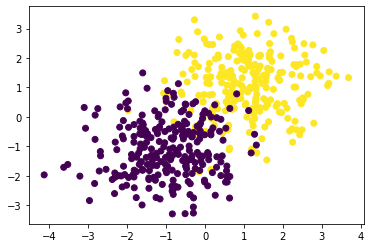

In [126]:
f,l = gen_data(250, 250)
plt.scatter(f[:,0],f[:,1],c=l,marker='o')
print("Original data")
plt.show()

Linear PCA


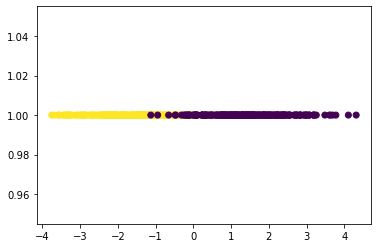

In [130]:
pca1 = PCA(f,l,1)
print("Linear PCA")
plt.scatter(pca1,np.ones(500),c=l)

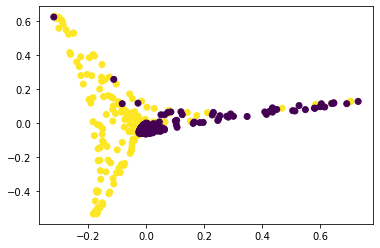

Gaussian Kernel


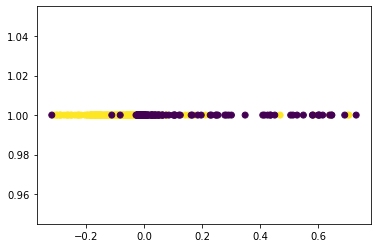

In [134]:
X_kpca = kernel_pca(f, n_components=2, kernel ="G", hyperparameter=10)
plt.scatter(X_kpca[:,0],X_kpca[:,1],c=l,marker='o')
plt.show()
print("Gaussian Kernel")
X_kpca = kernel_pca(f, n_components=1, kernel ="G", hyperparameter=10)
plt.scatter(X_kpca,np.ones(500),c=l)

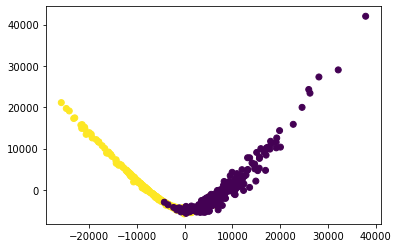

Polynomial Kernel


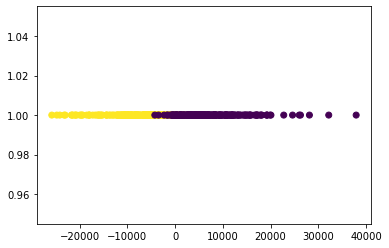

In [135]:
X_kpca = kernel_pca(f, n_components=2, kernel ="P", hyperparameter=6)
plt.scatter(X_kpca[:,0],X_kpca[:,1],c=l,marker='o')
plt.show()
print("Polynomial Kernel")
X_kpca = kernel_pca(f, n_components=1, kernel ="P", hyperparameter=6)
plt.scatter(X_kpca,np.ones(500),c=l)

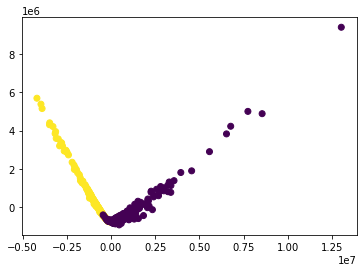

Laplacian Kernel


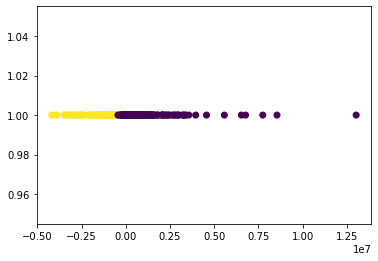

In [137]:
X_kpca = kernel_pca(f, n_components=2, kernel ="La", hyperparameter=9)
plt.scatter(X_kpca[:,0],X_kpca[:,1],c=l,marker='o')
plt.show()
print("Laplacian Kernel")
X_kpca = kernel_pca(f, n_components=1, kernel ="La", hyperparameter=9)
plt.scatter(X_kpca,np.ones(500),c=l)

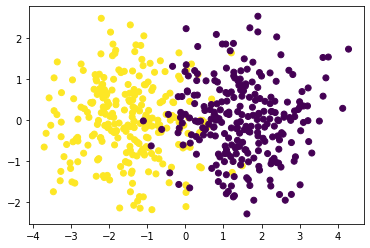

Sigmoid Kernel


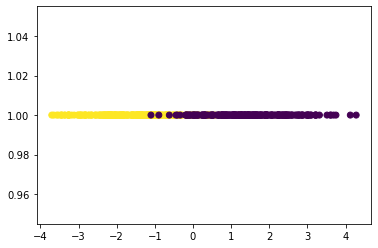

In [138]:
X_kpca = kernel_pca(f, n_components=2, kernel ="S", hyperparameter=1)
plt.scatter(X_kpca[:,0],X_kpca[:,1],c=l,marker='o')
plt.show()
print("Sigmoid Kernel")
X_kpca = kernel_pca(f, n_components=1, kernel ="S", hyperparameter=1)
plt.scatter(X_kpca,np.ones(500),c=l)